In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_curve, roc_auc_score, precision_recall_curve, auc
)
from imblearn.over_sampling import SMOTE  # For handling class imbalance
import xgboost as xgb


c:\Users\heave\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import chardet

with open(r"C:\Users\heave\Downloads\Bron_Projects\%Pro\CV\Customer Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
# Load the dataset with the correct encoding
df = pd.read_csv(r"C:\Users\heave\Downloads\Bron_Projects\%Pro\CV\Customer Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv",
                encoding='ascii'
)


df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [4]:
# Check for missing values
print("\nMissing values in the dataset:")
df.isnull().sum()


Missing values in the dataset:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
print("\nData types of each column:")
df.info()


Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilli

In [6]:
# Check the distribution of the target variable (Churn)
print("\nDistribution of Churn:")
df['Churn'].value_counts()


Distribution of Churn:


Churn
No     5174
Yes    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Churn Distribution')

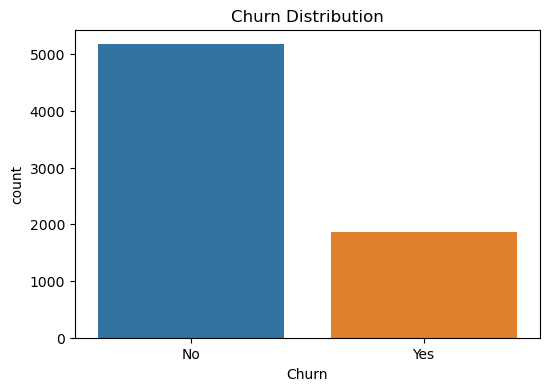

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x ='Churn', data=df)
plt.title("Churn Distribution")

Text(0.5, 1.0, 'Churn vs. tenure')

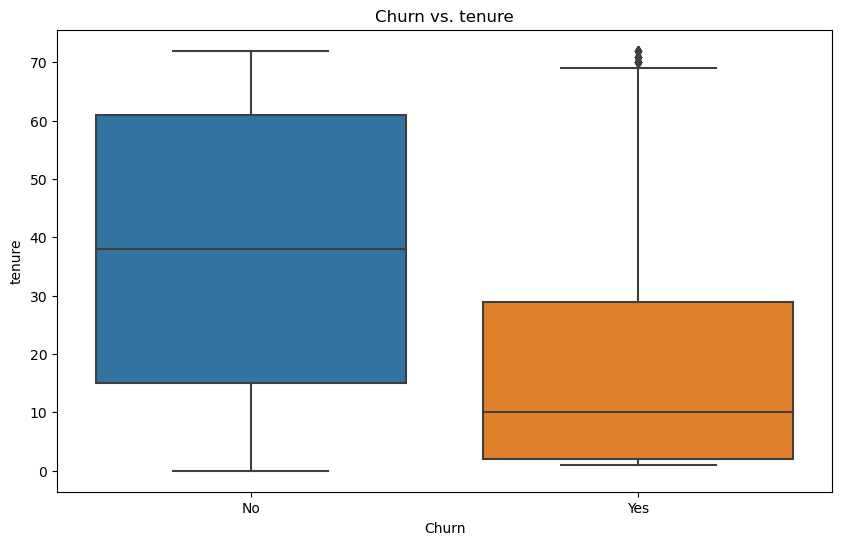

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs. tenure')

In [9]:
# Data Cleaning
# Convert 'TotalCharges' to numeric (it's stored as object/string)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#drop row missing with values
df.dropna(inplace=True)

# Drop 'customerID' column (not useful for prediction)
df.drop(columns=['customerID'], inplace=True)

In [10]:
#Encode Categorical Variables
df = pd.get_dummies(df, drop_first=True)

In [11]:
df = df.astype(int)

df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [12]:
# Feature Selection
# Separate features (X) and target variable (y)
X = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']

In [13]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [14]:
# Step 7: Train-Test Split
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Step 8: Feature Scaling
# Scale the features to ensure all features contribute equally to the model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Step 9: Train a Random Forest Classifier
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [17]:
# GridSearch for best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [18]:
# Predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

In [19]:
# Evaluate the Model
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[939  94]
 [193 181]]


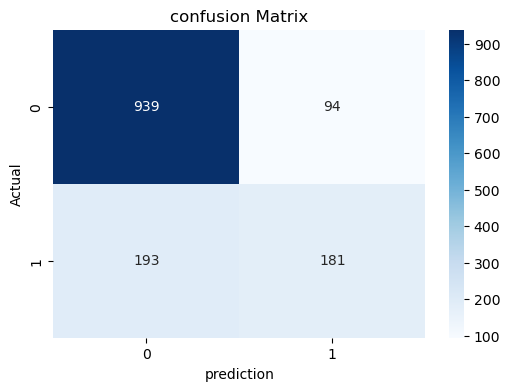

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("confusion Matrix")
plt.xlabel("prediction")
plt.ylabel("Actual")
plt.show()

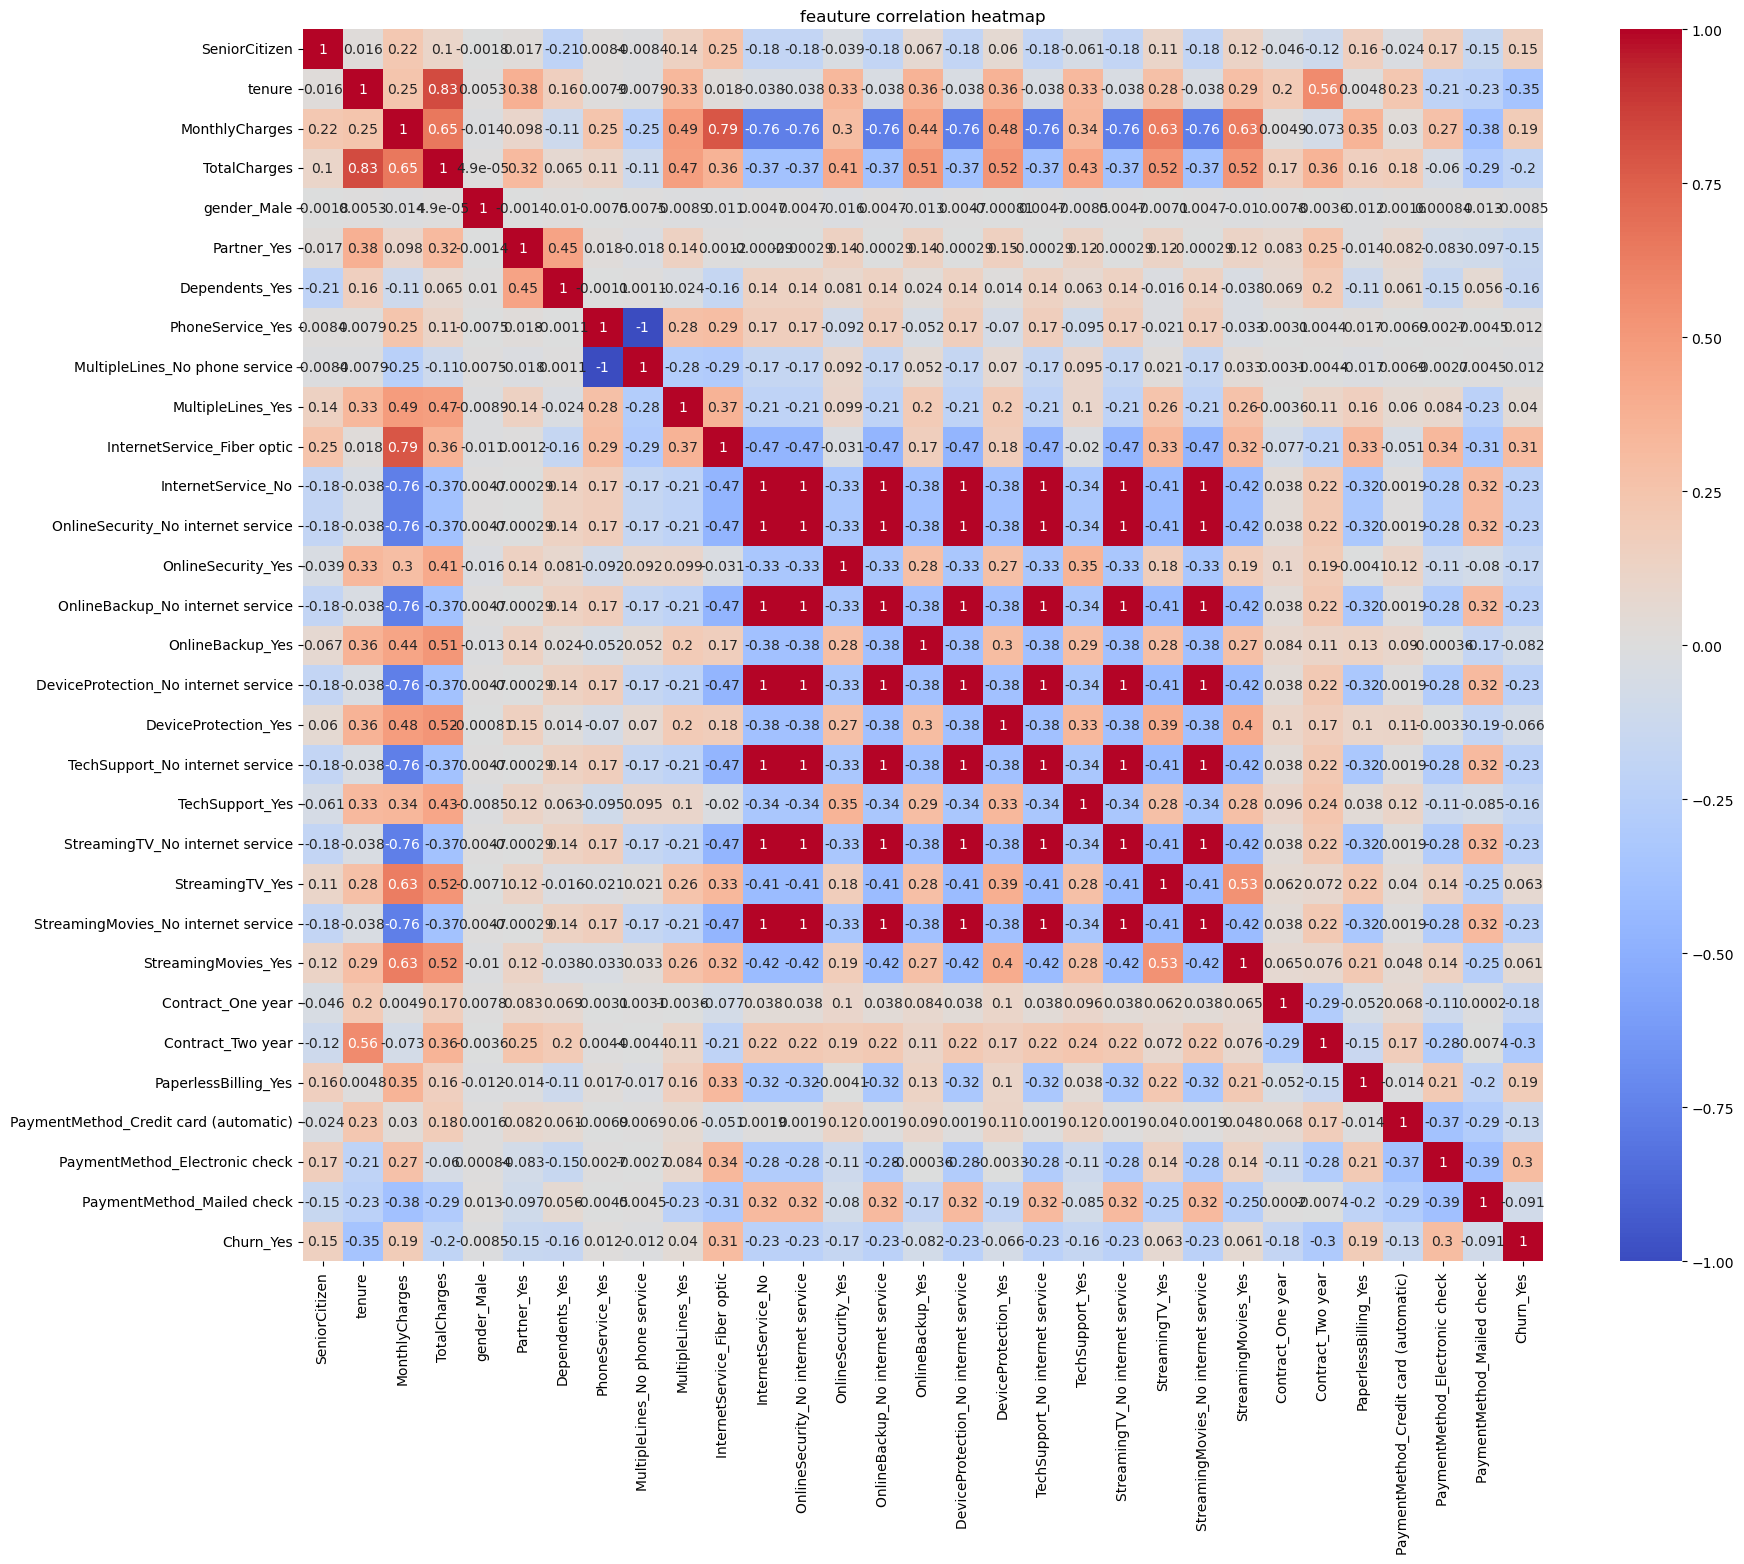

In [21]:
plt.figure(figsize=(20, 16))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('feauture correlation heatmap')
plt.show()

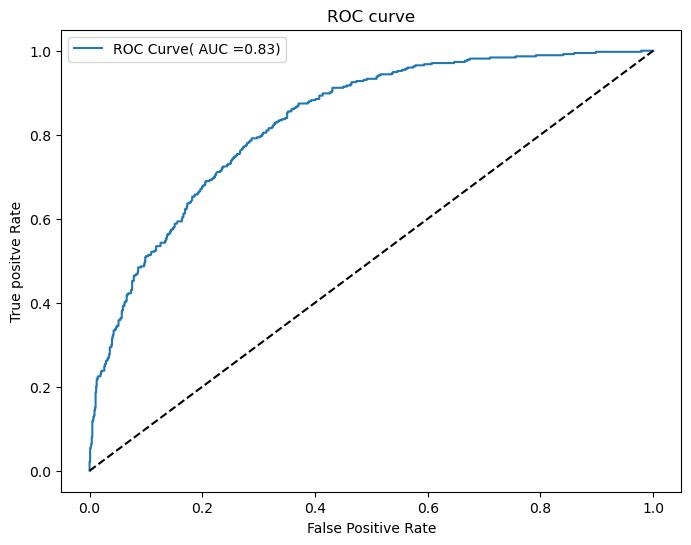

In [22]:
#Roc Curve
fpr,tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, label=f'ROC Curve( AUC ={roc_auc:.2f})')
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True positve Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

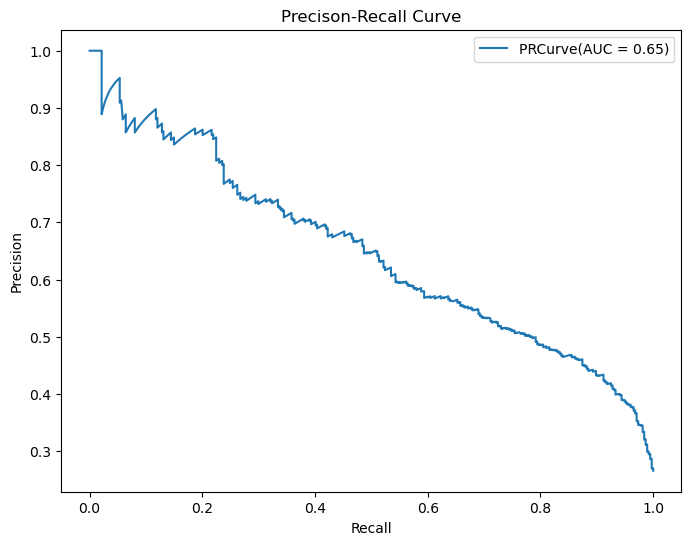

In [23]:
#precision-Recall Curve
precision,recall, _= precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label =f'PRCurve(AUC = {pr_auc:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precison-Recall Curve")
plt.legend()
plt.show()

In [24]:
print("\Accuracy Score:")
print(classification_report(y_test, y_pred))

\Accuracy Score:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407

